In [ ]:
""" Data set: TeePublic_review.csv
       - reviewer_id: Mã định danh duy nhất cho mỗi người đánh giá, đảm bảo tính ẩn danh và riêng tư.

       - store_location: Thông tin địa lý chỉ định vị trí của cửa hàng thời trang TeePublic.

       - latitude: Tọa độ vĩ độ của vị trí cửa hàng, cung cấp dữ liệu địa lý chính xác.

       - longitude: Tọa độ kinh độ của vị trí cửa hàng, mang lại thông tin địa lý chi tiết.

       - date: Ngày cụ thể khi đánh giá được đăng, cho phép phân tích theo thời gian.

       - month: Tháng trong đó đánh giá được đăng, hỗ trợ việc khám phá xu hướng hàng tháng.

       - year: Năm của đánh giá, cho phép phân tích hàng năm và nhận diện xu hướng.

       - title: Tiêu đề liên quan đến mỗi đánh giá, ghi lại cảm nhận ngắn gọn hoặc điểm chính.

       - review: Nội dung văn bản của đánh giá, trình bày phản hồi chi tiết từ khách hàng.

       - review-label: Điểm đánh giá của người đánh giá trên thang điểm từ 1 đến 5, cung cấp một đánh giá số liệu về sự hài lòng.  """

In [1]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")



df = pd.read_csv('TeePublic_review1.csv', encoding='latin1')

# Tiền xử lý dữ liệu
df['review'].fillna('', inplace=True)
data = df[['review', 'review-label']]
train_data, test_data, train_labels, test_labels = train_test_split(data['review'], data['review-label'], test_size=0.1, random_state=50)

# Chuyển đổi văn bản thành vector TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)


#Xây dựng mô hình học máy
# Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(train_vectors, train_labels)
predictions_nb = naive_bayes.predict(test_vectors)

# Support Vector Machine (SVM)
svm = SVC(C=1, kernel='linear')
svm.fit(train_vectors, train_labels)
predictions_svm = svm.predict(test_vectors)

# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50)
mlp.fit(train_vectors, train_labels)
predictions_mlp = mlp.predict(test_vectors)

# Random Forest
rf = RandomForestClassifier()
rf.fit(train_vectors, train_labels)
predictions_rf = rf.predict(test_vectors)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(train_vectors, train_labels)
predictions_knn = knn.predict(test_vectors)

# Hiệu suất
print('Naive Bayes:')
print('Accuracy:', accuracy_score(test_labels, predictions_nb))
print('Classification Report:\n', classification_report(test_labels, predictions_nb))

print('\nSupport Vector Machine:')
print('Accuracy:', accuracy_score(test_labels, predictions_svm))
print('Classification Report:\n', classification_report(test_labels, predictions_svm))

print('\nNeural Network:')
print('Accuracy:', accuracy_score(test_labels, predictions_mlp))
print('Classification Report:\n', classification_report(test_labels, predictions_mlp))

print('\nRandom Forest:')
print('Accuracy:', accuracy_score(test_labels, predictions_rf))
print('Classification Report:\n', classification_report(test_labels, predictions_rf))

print('\nK-Nearest Neighbors:')
print('Accuracy:', accuracy_score(test_labels, predictions_knn))
print('Classification Report:\n', classification_report(test_labels, predictions_knn))



Naive Bayes:
Accuracy: 0.804
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        44
           5       0.80      1.00      0.89       402

    accuracy                           0.80       500
   macro avg       0.16      0.20      0.18       500
weighted avg       0.65      0.80      0.72       500


Support Vector Machine:
Accuracy: 0.814
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.15      0.25        20
           2       0.00      0.00      0.00        13
           3       0.20      0.05      0.08        21
           4       1.00      0.02      0.04        44
           5       0.82      1.00      0.90       402

    accuracy                           0.81       500
   macro avg 

In [10]:
# Tối ưu hóa  sử dụng GridSearchCV

param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=3)
grid_search_svm.fit(train_vectors, train_labels)
best_svm = grid_search_svm.best_estimator_
predictions_svm_optimized = best_svm.predict(test_vectors)

print('\nOptimized SVM:')
print('Accuracy:', accuracy_score(test_labels, predictions_svm_optimized))
print('Classification Report:\n', classification_report(test_labels, predictions_svm_optimized))


param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3)
grid_search_rf.fit(train_vectors, train_labels)
best_rf = grid_search_rf.best_estimator_
predictions_rf_optimized = best_rf.predict(test_vectors)

print('\nOptimized Random Forest:')
print('Accuracy:', accuracy_score(test_labels, predictions_rf_optimized))
print('Classification Report:\n', classification_report(test_labels, predictions_rf_optimized))

param_grid_knn = {'n_neighbors': [3, 5, 10], 'leaf_size': [30, 50, 100]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3)
grid_search_knn.fit(train_vectors, train_labels)
best_knn = grid_search_knn.best_estimator_
predictions_knn_optimized = best_knn.predict(test_vectors)

print('\nOptimized K-Nearest Neighbors:')
print('Accuracy:', accuracy_score(test_labels, predictions_knn_optimized))
print('Classification Report:\n', classification_report(test_labels, predictions_knn_optimized))


Optimized SVM:
Accuracy: 0.8148
Classification Report:
               precision    recall  f1-score   support

           1       0.23      0.03      0.05       104
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00       116
           4       0.00      0.00      0.00       186
           5       0.82      1.00      0.90      2034

    accuracy                           0.81      2500
   macro avg       0.21      0.21      0.19      2500
weighted avg       0.68      0.81      0.74      2500


Optimized Random Forest:
Accuracy: 0.8176
Classification Report:
               precision    recall  f1-score   support

           1       0.46      0.06      0.10       104
           2       0.21      0.05      0.08        60
           3       0.20      0.02      0.03       116
           4       0.50      0.02      0.04       186
           5       0.83      1.00      0.90      2034

    accuracy                           0.82      2500
   macr

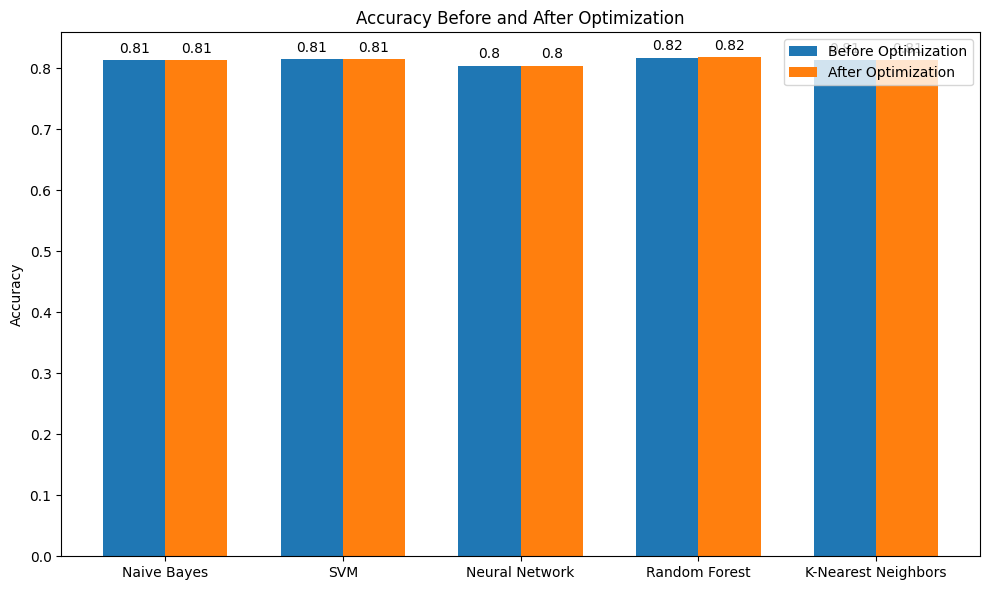

In [13]:

# Vẽ biểu đồ so sánh trước và sau khi tối ưu
labels = ['Naive Bayes', 'SVM', 'Neural Network', 'Random Forest', 'K-Nearest Neighbors']
accuracy_before_optimization = [accuracy_score(test_labels, predictions_nb),
                                accuracy_score(test_labels, predictions_svm),
                                accuracy_score(test_labels, predictions_mlp),
                                accuracy_score(test_labels, predictions_rf),
                                accuracy_score(test_labels, predictions_knn)]

accuracy_after_optimization = [accuracy_score(test_labels, predictions_nb),
                                accuracy_score(test_labels, predictions_svm_optimized),
                                accuracy_score(test_labels, predictions_mlp),
                                accuracy_score(test_labels, predictions_rf_optimized),
                                accuracy_score(test_labels, predictions_knn_optimized)]

x = np.arange(len(labels))  # Vị trí của các nhóm trên trục x
width = 0.35  # Độ rộng của thanh

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy_before_optimization, width, label='Before Optimization')
rects2 = ax.bar(x + width/2, accuracy_after_optimization, width, label='After Optimization')

# Thêm các nhãn, tiêu đề và chú giải
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Before and After Optimization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Hiển thị giá trị trên thanh
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 điểm trên thanh để hiển thị giá trị
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()